# Regresión Lineal en Python

## 1. Introducción

El análisis de regresión es uno de los modelos estadísticos más ampliamente utilizados para el análisis de la relación de una variable $y$ (variable respuesta), y un conjunto de covariables $x_1,\ldots,x_p$.
Dados un conjunto de observaciones medidas sobre una muestra de tamaño $n$, el modelo de regresión lineal se expresa usualmente de la siguiente forma:

$$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i1} + \cdots + \beta_{ip} x_{ip} + e_i, \mathrm{\ \ \ }i=1,\ldots,n$$
donde $y_i$ es la variable respuesta medida sobre la $i$-ésima unidad muestral, $x_{ij}$ es la covariable $j$-ésima medida en el individuo $i$-ésimo y $e_i$ es un término aleatorio de error (no observable) de media $0$. Los coeficientes $\beta_j$ son llamados parámetros y son estimados a partir de la información obtenida en la muestra.

El término *lineal*, hace referencia a la linealidad de los parámetros. Esto es, al derivar la expresión del modelo con respecto a cualquiera de los parámetros, la derivada no depende de ningún $\beta_j$. 

Cabe anotar que la representación presentada del modelo de regresión no es única y universal, pues el modelo puede incluir interacciones entre las covariables si el investigador tiene la hipótesis de que el efecto de una de las covariables en la variable respuesta puede ser afectado por alguna covariable adicional. 

A través de este breve ensayo, conoceremos un poco sobre el análisis de regresión, cómo se estiman los parámetros del modelo y veremos cómo podemos implementarlo en Python por medio de un ejemplo con datos reales.
Para más información acerca de la teoría de los modelos de regresión y de los modelos lineales en general:
- [Methods and Applications of Linear Models: Regression and the Analysis of Variance - Hocking, R. (2003)](https://onlinelibrary.wiley.com/doi/book/10.1002/0471434159)
- [Generalized Linear Models - McCullagh \& Nelder (1989)](https://link.springer.com/chapter/10.1007/978-3-642-60232-0_7)

## 2. Estimación de Parámetros

Los parámetros del modelo de regresión son estimados por el método de mínimos cuadrados. Para ilustrar en qué consiste este método, supongamos el modelo con una sola varible independiente o regresora $x$:

$$y_i = \beta_0 + \beta_1x_{i} + e_i$$

La recta de regresión, es la recta de pendiente $b_1$ e intercepto $b_0$, que minimiza la siguiente expresión:

$$\sum_{i = 1}^{n}e_i^2 = \sum_{i = 1}^{n}(y_i-(\beta_0 + \beta_1x_i))^2$$

La siguiente imagen muestra un ejemplo de la recta de regresión estimada (en color rojo) a partir de los datos representados en la nube de puntos:
[Ejemplo: Recta de regresión](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal#/media/Archivo:Linear_regression.svg)

Cuando el modelo involucra 2 covariables, el modelo ajustado se puede representar gráficamente por medio de un plano. Con más de 2 covariables el modelo se representa teóricamente a través de un hiperplano.

Ahora, consideremos de forma general un modelo de regresión con $p$ covariables. Sean

$$\pmb{Y} = \begin{pmatrix}y_1\\ \vdots \\ y_n\end{pmatrix} \mathrm{\ \ \ \ } \pmb{e} = \begin{pmatrix}e_1\\ \vdots \\ e_n\end{pmatrix} \mathrm{\ \ \ \ } \pmb{\beta} = \begin{pmatrix}\beta_0\\ \vdots \\ \beta_p\end{pmatrix} \mathrm{\ \ \ \ } \pmb{X} = \begin{pmatrix} 1 & x_{11} & \cdots & x_{p1} \\ 1 & x_{12} & \cdots & x_{p2} \\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_{1n} & \cdots & x_{pn} \end{pmatrix}$$

El modelo de regresión se puede expresar matricialmente de la siguiente forma:

$$\pmb{Y} = \pmb{X}\pmb{\beta} + \pmb{e}$$

Luego, la expresión a minimizar para la estimación de los parámetros es:

$$\sum_{i = 1}^{n}e_i^2 = \sum_{i = 1}^{n}(y_i-(\beta_0 + \beta_1x_{1i} + \cdots + \beta_px_{pi}))^2 = (\pmb{Y}-\pmb{X}\pmb{\beta})^t(\pmb{Y}-\pmb{X}\pmb{\beta})$$

Derivando en términos de $\pmb{\beta}$ e igualando a $0$, se tiene que

$$\pmb{X}^t\pmb{X}\hat{\pmb{\beta}} = \pmb{X}^t\pmb{Y}$$

Así, el estimador de mínimos cuadrados de ${\pmb{\beta}}$ es $\hat{\pmb{\beta}} = [\pmb{X}^t\pmb{X}]^{-1}\pmb{X}^t\pmb{Y}$


## 3. Ejemplo 1: Precio de vehículos
En este ejemplo se pretende modelar el precio de vehículos en función de los caballos de fuerza del motor, el peso del vehículo sin pasajeros ni carga y el tipo de vehículo.
Los datos utilizados para este ejercicio pueden ser descargados en el siguiente enlace:
[car price](https://www.kaggle.com/hellbuoy/car-price-prediction?select=CarPrice_Assignment.csv)

Los tipos de vehículos dentro del conjunto de datos son:

- [Convertible](Imagenes/convertible.jpg)
- [Hardtop](Imagenes/hardtop.jpg)
- [Hatchback](Imagenes/hatchback.jpg)
- [Sedan](Imagenes/sedan.jpg)
- [Wagon](Imagenes/wagon.jpg)


#### Carga de librerías

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import os
import xlrd
import statsmodels
from statsmodels.formula.api import ols
import plotnine
from plotnine import ggplot, aes, geom_point, geom_boxplot, ggtitle, scale_fill_brewer, labs

#### Carga de datos

In [3]:
# os.chdir("C:/Users/juan.bernal/OneDrive - Ipsos/Juan Camilo Bernal Castillo/Procedimientos - Juan/Documentos/Universidad/Maestría/4to Semestre/Tópicos Avanzados - Ciencia de Datos/Tarea 2 - Jupyter Lab")
datos = pd.read_excel("Datos/CarPrice_Assignment.xlsx")
datos.head()
datos.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,66.704098,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.709756
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,450.871246,3.972040,39.544167,476.985643,6.542142,6.886443,7988.851862
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,3255.000000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Gráficas Descriptivas
El siguiente diagrama de cajas y bigotes muestra la distribución del precio en función del tipo de vehículo.
Se observa que los vehículos convertibles y de techo rígido (hardtop) tienden a tener precios mayores a vehículos de tipo sedan, wagon y hatchback. Aunque también presentan una dispersión considerable.

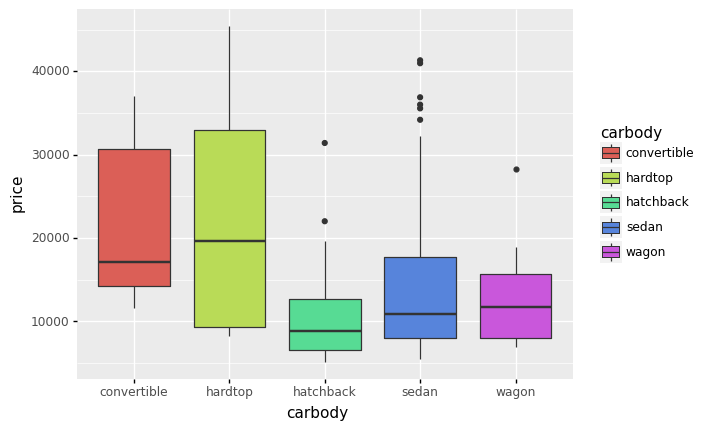

<ggplot: (120541896512)>

In [8]:
# Precio por tipo de vehículo
ggplot(datos, aes(x='carbody', y='price', fill = 'carbody')) + geom_boxplot() 

En el siguiente gráfico de dispersión se observa que existe una relación directa entre el peso del vehículo y su precio. Esto parece aplicar en general a todos los tipos de vehículo.

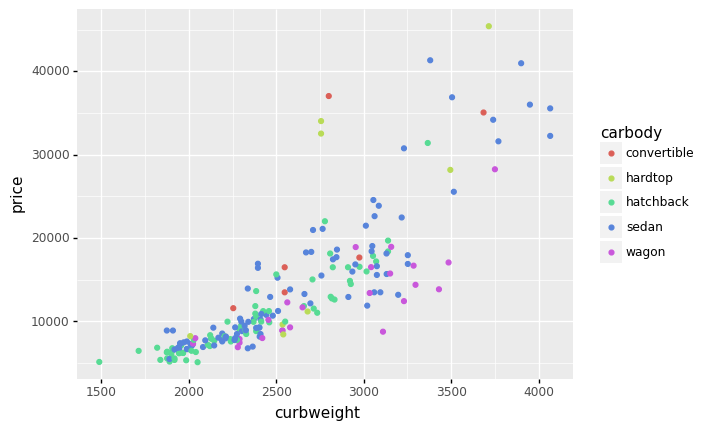

<ggplot: (120541896611)>

In [9]:
# Peso vehículo vs Precio
ggplot(datos, aes(x='curbweight', y='price', color = 'carbody')) + geom_point() 

Aparentemente también existe una relación directa entre los caballos de fuerza del motor y el precio del vehículo, como se muestra en el siguiente diagrama de dispersión.

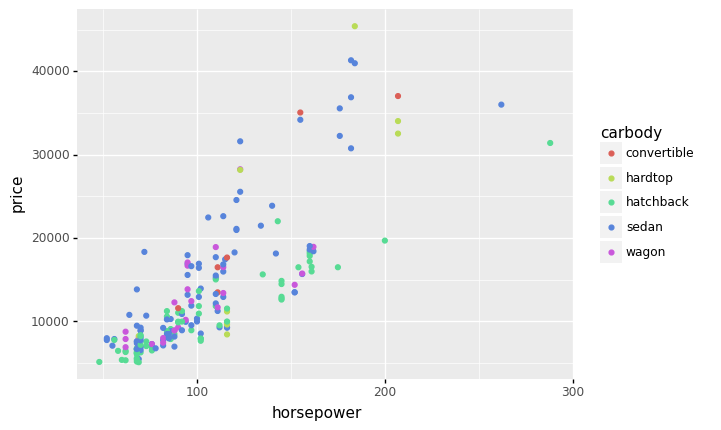

<ggplot: (120535189935)>

In [7]:
# Caballos de fuerza vs Precio
ggplot(datos, aes(x='horsepower', y='price', color = 'carbody')) + geom_point() 
 

#### Modelo de regresión 1
A continuación se presentan las estimaciones del modelo de regresión del precio vs los caballos de fuerza, el peso y el tipo de vehículo (variable categórica) usando la función *ols()* del paquete statsmodels que permite especificar el modelo a estimar de forma intuitiva.

La variable *carbody* (tipo de vehpiculo) al ser categórica, se especifica con la letra 'C' como se observa en la siguiente sintaxis.

In [12]:
variables = ['curbweight', 'horsepower', 'carbody']
X = datos[variables]
y = datos['price']

model_1 = ols('price ~ horsepower + curbweight + C(carbody)', data=datos)
fitted_model_1 = model_1.fit()
y_pred_1 = fitted_model_1.predict(X)
fitted_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     140.1
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           1.81e-68
Time:                        21:56:27   Log-Likelihood:                -1962.6
No. Observations:                 205   AIC:                             3939.
Df Residuals:                     198   BIC:                             3962.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1.095e+04   2056.465     -5.326      0.000    -1.5e+04   -6898.349
C(carbody)[T.hardtop]    -538.0004   1914.880     -0.281      0.779   -4314.178    3238.177
C(carbody)[T.hatchback] -5518.9962   1523.403     -3.623      0.000   -8523.173   -2514.820
C(carbody)[T.sedan]     -3859.1164   1503.245     -2.567      0.011   -6823.541    -894.692
C(carbody)[T.wagon]     -6845.4672   1646.013     -4.159      0.000   -1.01e+04   -3599.501
horsepower                 73.8985     10.395      7.109      0.000      53.400      94.397
curbweight                  8.2502      0.808     10.210      0.000       6.657       9.844
==============================================================================
Omnibus:                       26.274   Durbin-Watson:                   0.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.566
Skew:                           0.605   Prob(JB):                     8.59e-13
Kurtosis:                       5.245   Cond. No.                     3.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A partir de las tablas de resumen podemos decir que existe una relación entre las variables consideradas y el precio de los vehículos, puesto que los parámetros asociados son estadísticamente significativos. Adicionalmente, con este modelo es posible explicar el $80.9\%$ de la variabilidad del precio. Aunque los resultados deben interpretarse con precaución puesto que puede haber colinialidad entre las variables peso y caballos de fuerza.

#### Modelo de regresión 2
Se ajusta un segundo modelo omitiendo la variable tipo de vehículo. Pese a que el $R^2$ se reduce un poco en comparación con el primer modelo ajustado, este modelo es más parsimonioso que el anterior. Es decir, que involucra menos parámetros, lo cual es un atributo atractivo en un modelo de regresión puesto que las estimaciones de los parámetros pueden interpretarse con mayor facilidad. 

In [ ]:
model_2 = ols('price ~ horsepower + curbweight', data=datos)
fitted_model_2 = model_2.fit()
y_pred_2 = fitted_model_2.predict(X.drop(['carbody'],1))
fitted_model_2.summary()


A continuación se presenta el plano ajustado a los datos (Modelo de regresión 2). En color azul se muestran los datos observados y en rojo los valores ajustados por medio del modelo (estos últimos se ubican sobre el plano).

#### Gráfica del plano de regresión ajustado (Modelo 2)

8.037492205932596


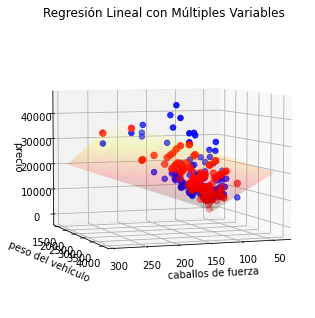

In [25]:
fig = plt.figure()
ax = Axes3D(fig)
# Creamos una malla, sobre la cual graficaremos el plano
X.describe()
xx, yy = np.meshgrid(np.linspace(40, 290, num=10), np.linspace(1450, 4100, num=50))
 
# calculamos los valores del plano para los puntos x e y
beta = fitted_model_2.params
print(beta[2])
nuevoX = (beta[1] * xx)
nuevoY = (beta[2] * yy) 
# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + beta[0])
# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')
# Graficamos en azul los puntos en 3D
X.head()
ax.scatter(X['horsepower'], X['curbweight'], y, c='blue',s=30)
# Graficamos en rojo, los puntos que 
ax.scatter(X['horsepower'], X['curbweight'], y_pred_2, c='red',s=40)
# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=5., azim=70)
ax.set_xlabel('caballos de fuerza')
ax.set_ylabel('peso del vehículo')
ax.set_zlabel('precio')
ax.set_title('Regresión Lineal con Múltiples Variables')
plt.show()

## 4. Conclusiones

- El análisis de regresión es uno de los campos de la estadística más desarrollados en la teoría y de más alto uso en todo tipo de campos de aplicación.
- Los modelos de regresión son bastante útiles para entender cómo un conjunto de variables independientes se relacionan con la variables dependiente de estudio.
- Una cualidad de los modelos de regresión es la interpretación intuitiva de los parámetros, especialmente cuando el número de covariables involucradas en pequeño.